接下来我们要将的一系列方法主要用于回归分析，也就是说目标值是输入值的线性合成。在数学公式中，如果我们用y^来表示预测值：
【插入图片】
在整个模块中，我们指定𝑤 = (𝑤1, ...,𝑤𝑝)做为coef_，w0表示intercept_。
如果需要利用广义线性模型执行分类操作，那么请查看Logisitc Regression章节。

## Ordinary Least Squares，普通最小二乘法

LinearRegression使用系数𝑤 = (𝑤1, ...,𝑤𝑝)拟合一个线性模型，然后计算数据集中的每一个数据通过线性模型计算得到的值，与实际对应的值求平方差，然后将所有的平方差加起来，使这个和最小。从数学角度上来看，就是实现了如下的方程：

【插入图片】

LinearRegression使用fit方法对X，y数据进行计算，然后将线性模型的系数w保存在coef_成员中：

In [1]:
from sklearn import linear_model

In [2]:
reg=linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
reg.coef_

array([ 0.5,  0.5])

然而，普通最小二乘法的系数预测十分依赖模型数据的独立性。如果数据存在相关性，举行X的列之间存在近似线性依赖，X就会近似奇异，因此，最小二乘法预测就会对于观测值的随机误差十分敏感，产生较大的变化。这种多重共线性，当收集的数据没有经过设计的情况下，经常会出现。

## Example

我们来看一个例子，在diabetes糖尿病数据集中，我们只是用第一个特征，以便实现一个2维的回归计算。在图中可以看到，线性回归尝试绘制一条只想，尽可能减少预测值和观测值之间的方差和。


Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


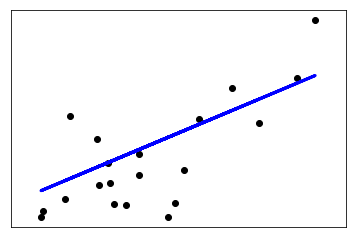

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
#加载diabetes数据集
diabetes = datasets.load_diabetes()
#只是用第一个特征，这里是如何实现的？希望大家能自己尝试一下。
diabetes_X = diabetes.data[:, np.newaxis, 2]
# 将数据分解成训练和测试集，最后20个数据用来测试。
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# 将目标值同样划分为训练和测试集
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
# 创建线性回归模型，参数一般使用模型的即可。
regr = linear_model.LinearRegression()
# 利用fit方法来进行模型训练，需要的参数是X和y的训练集。
regr.fit(diabetes_X_train, diabetes_y_train)
# 训练好之后，通过predict方法进行预测
diabetes_y_pred = regr.predict(diabetes_X_test)
# 打印计算得到的系数
print('Coefficients: \n', regr.coef_)
# 打印均方差
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 解释方差分数，1是最佳拟合。
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# 绘图，scatter表示散点图
# plot是直线
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
